<a href="https://colab.research.google.com/github/Mehedi1950/p2/blob/main/IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Replace 'healthcare_data.csv' with the path to your dataset
data = pd.read_csv('/content/healthcare_dataset.csv')

# Preview the first few rows
print(data.head())

# Summary of the dataset
print(data.info())


            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [2]:
# Check for missing values
print(data.isnull().sum())

# Choose a specific column to analyze
column_name = 'age'  # Replace with the column you want to analyze


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

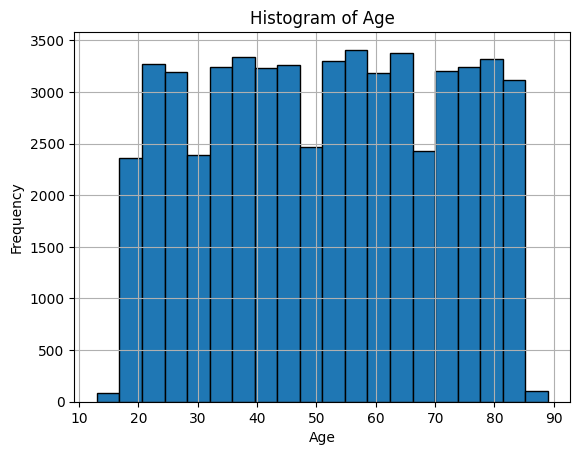

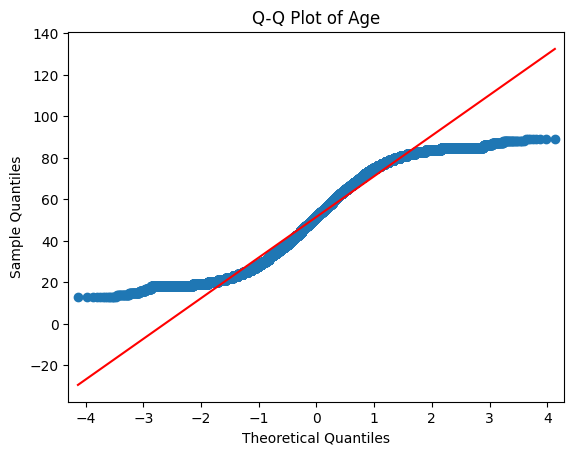

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

# Replace 'healthcare_data.csv' with the path to your dataset
data = pd.read_csv('/content/healthcare_dataset.csv')

# Preview the first few rows
print(data.head())

# Summary of the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Choose a specific column to analyze
# Make sure the column name matches the name in the CSV file
# It's case-sensitive and should include spaces if present in the CSV
column_name = 'Age'  # Changed from 'age' to 'Age' assuming the column in the CSV is named 'Age'

# Histogram for the selected column
data[column_name].hist(bins=20, edgecolor='black')
plt.title(f"Histogram of {column_name}")
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot to assess Normality
qqplot(data[column_name].dropna(), line='s')
plt.title(f"Q-Q Plot of {column_name}")
plt.show()

In [5]:
shapiro_test = stats.shapiro(data[column_name].dropna())
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print(f"{column_name} likely follows a Normal distribution.")
else:
    print(f"{column_name} does not follow a Normal distribution.")


Shapiro-Wilk Test Statistic: 0.9567, p-value: 0.0000
Age does not follow a Normal distribution.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 55500.
  res = hypotest_fun_out(*samples, **kwds)


In [6]:
# Check if the mean is approximately equal to the variance
mean = data[column_name].mean()
variance = data[column_name].var()
print(f"Mean: {mean:.4f}, Variance: {variance:.4f}")

if abs(mean - variance) < 0.1 * mean:
    print(f"{column_name} might follow a Poisson distribution.")
else:
    print(f"{column_name} is unlikely to follow a Poisson distribution.")


Mean: 51.5395, Variance: 384.2562
Age is unlikely to follow a Poisson distribution.


In [18]:
from scipy.stats import binomtest
import pandas as pd

# Assuming `data` is your loaded DataFrame
# Replace 'Medical Condition' with the actual column name in your dataset if different
# Create a binary column where 1 indicates a medical condition is present
data['Has_Medical_Condition'] = data['Medical Condition'].notnull().astype(int)

# Count the number of successes (patients with a medical condition)
successes = data['Has_Medical_Condition'].sum()

# Count the total number of patients
total = data['Has_Medical_Condition'].count()

# Perform the Binomial Test (assuming 50% probability for having a medical condition)
p_value = binomtest(successes, n=total, p=0.5).pvalue

# Output the results
print(f"Binomial Test p-value: {p_value:.4f}")
if p_value > 0.05:
    print("Data likely follows a Binomial distribution.")
else:
    print("Data does not follow a Binomial distribution.")
columns_to_analyze = ['age', 'hospital_visits', 'blood_pressure']  # Add relevant column names
for col in columns_to_analyze:
    print(f"Analyzing {col}...")
    # Insert visualization and test code here for each column


Binomial Test p-value: 0.0000
Data does not follow a Binomial distribution.
Analyzing age...
Analyzing hospital_visits...
Analyzing blood_pressure...


In [17]:
columns_to_analyze = ['age', 'hospital_visits', 'blood_pressure']  # Add relevant column names
for col in columns_to_analyze:
    print(f"Analyzing {col}...")
    # Insert visualization and test code here for each column


Analyzing age...
Analyzing hospital_visits...
Analyzing blood_pressure...


In [21]:
from scipy.stats import shapiro

# Normality test for 'age'
shapiro_test = shapiro(data['age'])
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("Age data likely follows a normal distribution.")
else:
    print("Age data does not follow a normal distribution.")


KeyError: 'age'

In [22]:
columns_to_analyze = ['Has_Medical_Condition']  # Add binary columns only
for col in columns_to_analyze:
    print(f"Analyzing {col}...")
    successes = data[col].sum()
    total = data[col].count()
    p_value = binomtest(successes, n=total, p=0.5).pvalue
    print(f"Binomial Test p-value for {col}: {p_value:.4f}")


Analyzing Has_Medical_Condition...
Binomial Test p-value for Has_Medical_Condition: 0.0000
